In [2]:
from google.colab import drive
import os

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
os.mkdir("/content/Hand_gesture")

In [6]:
!unzip "/content/gdrive/MyDrive/archive.zip" -d "/content/Hand_gesture"

Archive:  /content/gdrive/MyDrive/archive.zip
  inflating: /content/Hand_gesture/amer_sign2.png  
  inflating: /content/Hand_gesture/amer_sign3.png  
  inflating: /content/Hand_gesture/american_sign_language.PNG  
  inflating: /content/Hand_gesture/sign_mnist_test.csv  
  inflating: /content/Hand_gesture/sign_mnist_test/sign_mnist_test.csv  
  inflating: /content/Hand_gesture/sign_mnist_train.csv  
  inflating: /content/Hand_gesture/sign_mnist_train/sign_mnist_train.csv  


In [92]:
file= csv.reader("/content/Hand_gesture/sign_mnist_test/sign_mnist_test.csv",delimiter=",")


In [95]:
for rows in file:
  print(rows)

In [120]:
import csv
import pandas as pd
import numpy as np


file= pd.read_csv("/content/Hand_gesture/sign_mnist_test/sign_mnist_test.csv",delimiter=",")
labels=[]
images=[]
for i in range(len(file)):
  labels.append(file.loc[i][0])
  images.append(file.loc[i][1:])
test_label=np.asarray(labels).astype("float32")
image=np.asarray(images).astype("float32")
test_image=image.reshape(image.shape[0],28,28)

In [121]:
file= pd.read_csv("/content/Hand_gesture/sign_mnist_train/sign_mnist_train.csv",delimiter=",")
labels=[]
images=[]
for i in range(len(file)):
  labels.append(file.loc[i][0])
  images.append(file.loc[i][1:])
train_label=np.asarray(labels).astype("float32")
image=np.asarray(images).astype("float32")
train_image=image.reshape(image.shape[0],28,28)

In [122]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [123]:
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=0.2,width_shift_range=0.3,height_shift_range=0.2,zoom_range=0.2,fill_mode="nearest",horizontal_flip=True)
val_gen=ImageDataGenerator(rescale=1/255)

In [148]:
test_image=np.expand_dims(test_image,axis=3)
train_image=np.expand_dims(train_image,axis=3)

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1),padding="same"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2,padding="same"))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(26,activation="softmax"))

In [150]:
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["acc"])

In [151]:
history=model.fit_generator(train_gen.flow(train_image,train_label,batch_size=32),
                            epochs=15,verbose=1,validation_data=val_gen.flow(test_image,test_label,batch_size=32))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
858/858 [==============================] - 10s 11ms/step - loss: 2.9378 - acc: 0.1110 - val_loss: 1.3947 - val_acc: 0.4343
Epoch 2/15
858/858 [==============================] - 9s 11ms/step - loss: 1.2272 - acc: 0.5819 - val_loss: 0.3517 - val_acc: 0.8649
Epoch 3/15
858/858 [==============================] - 9s 11ms/step - loss: 0.5257 - acc: 0.8170 - val_loss: 0.1100 - val_acc: 0.9709
Epoch 4/15
858/858 [==============================] - 9s 11ms/step - loss: 0.3028 - acc: 0.8970 - val_loss: 0.1200 - val_acc: 0.9624
Epoch 5/15
858/858 [==============================] - 9s 11ms/step - loss: 0.2116 - acc: 0.9305 - val_loss: 0.0845 - val_acc: 0.9710
Epoch 6/15
858/858 [==============================] - 9s 11ms/step - loss: 0.1657 - acc: 0.9456 - val_loss: 0.0225 - val_acc: 0.9940
Epoch 7/15
858/858 [==============================] - 10s 11ms/step - loss: 0.1438 - acc: 0.9532 - val_loss: 0.0361 - val_acc: 0.9848
Epoch 8/15
858/858 [==============================] - 9s 11ms/step 

In [154]:
train_acc=history.history["acc"]
epoch=range(len(train_acc))

test_acc=history.history["val_acc"]

train_loss=history.history["loss"]

test_loss=history.history["val_loss"]



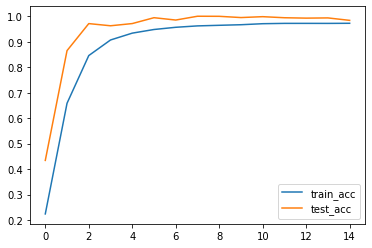

In [156]:
import matplotlib.pyplot as plt

plt.plot(epoch,train_acc,label="train_acc")
plt.plot(epoch,test_acc,label="test_acc")
plt.legend()

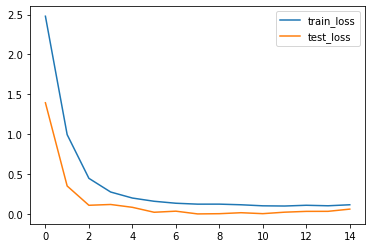

In [157]:
plt.figure()

plt.plot(epoch,train_loss,label="train_loss")
plt.plot(epoch,test_loss,label="test_loss")
plt.legend()